O método é estavel para $\omega < 1$.

Em geral, quanto maior for $\omega$ mais rápido corre o programa.

Assim, $\omega = 0,9$ é um bom valor para usar.

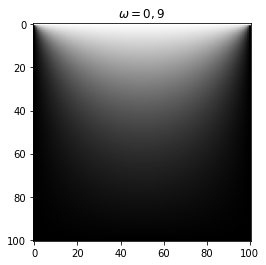

Wall time: 15.7 s


In [1]:
%%time
import numpy as np
import matplotlib.pyplot as plt

L = 1.0  #m
a = 0.01 #m
V = 1.0  #V
M = 100  # nº de pts
alvo = 10**-6
omega = 0.9

# Create arrays to hold potential values
phi = np.zeros([ M+1, M+1 ], float)
phi[0,:] = V                             # valores da barra de cima = V
phiVelho = np.zeros([ M+1, M+1 ], float) # phiVelho tem msm valores que phi
phiVelho[0,:] = V    


# Main loop
delta = 1.0
while delta > alvo:

    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if not ( i==0 or i==M or j==0 or j==M ) :   # se NÃO tivermos nas fronteiras
                phiVelho[i,j] = phi[i,j]
                phi[i,j] = (1 + omega) * (phi[i+1, j] + phi[i-1, j] + \
                            phi[i, j+1] + phi[i, j-1]) / 4 - omega*phi[i,j]

    # Calculate maximum difference from old values
    delta = np.max(abs(phi-phiVelho))

plt.imshow(phi)
plt.title("$\omega = 0,9$")
plt.gray()
plt.show()

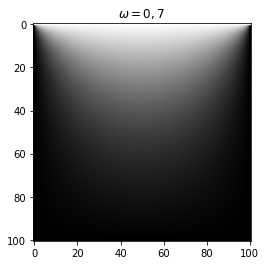

Wall time: 38.3 s


In [2]:
%%time

def testarCenas(omega):
    # Create arrays to hold potential values
    phi = np.zeros([ M+1, M+1 ], float)
    phi[0,:] = V                             # valores da barra de cima = V
    phiVelho = np.zeros([ M+1, M+1 ], float) # phiVelho tem msm valores que phi
    phiVelho[0,:] = V    

    # Main loop
    delta = 1.0
    while delta > alvo:

        # Calculate new values of the potential
        for i in range(M+1):
            for j in range(M+1):
                if not ( i==0 or i==M or j==0 or j==M ) :   # se NÃO tivermos nas fronteiras
                    phiVelho[i,j] = phi[i,j]
                    phi[i,j] = (1 + omega) * (phi[i+1, j] + phi[i-1, j] + \
                                phi[i, j+1] + phi[i, j-1]) / 4 - omega*phi[i,j]

        # Calculate maximum difference from old values
        delta = np.max(abs(phi-phiVelho))
    return phi

plt.imshow(testarCenas(0.7))
plt.title("$\omega = 0,7$")
plt.show()

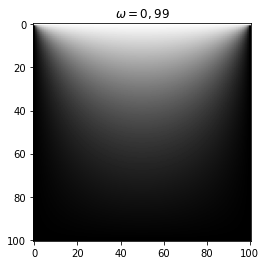

Wall time: 37.7 s


In [3]:
%%time
plt.imshow(testarCenas(0.99))
plt.title("$\omega = 0,99$")
plt.show()

<timed exec>:17: RuntimeWarning: overflow encountered in double_scalars
<timed exec>:17: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\tiago\Anaconda3\envs\O meu ambiente\lib\site-packages\matplotlib\image.py:449: RuntimeWarning: overflow encountered in double_scalars
  newmin = vmid - dv * fact
C:\Users\tiago\Anaconda3\envs\O meu ambiente\lib\site-packages\matplotlib\image.py:454: RuntimeWarning: overflow encountered in double_scalars
  newmax = vmid + dv * fact


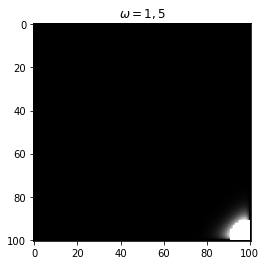

Wall time: 21.1 s


In [4]:
%%time
plt.imshow(testarCenas(1.5))
plt.title("$\omega = 1,5$")
plt.show()